# Medical Cost Prediction

In [32]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("insurance.csv")

df.head(10)

# age - age of primary beneficiary
# bmi - body mass index
# children - number of children covered by health insurance
# smoker - smoking
# region - the beneficiary's residential area in the US
# charges - individual medical costs billed by health insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data Preprocessing

In [34]:
print(df.shape)

df.drop_duplicates(inplace = True)

df.shape

(1338, 7)


(1337, 7)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [36]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [37]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
for i in df.columns:
  print(df[i].unique())

In [39]:
df['smoker'].replace({'yes': 1, 'no': 0}, inplace = True)
df['region'].replace({'southwest': 1, 'northwest': 2, 'northeast':3, 'southeast':4}, inplace = True)
df['sex'].replace({'male':0, 'female': 1}, inplace = True)

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,4,1725.55230
2,28,0,33.000,3,0,4,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
5,31,1,25.740,0,0,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,2,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,2,28923.13692


# Data Understanding

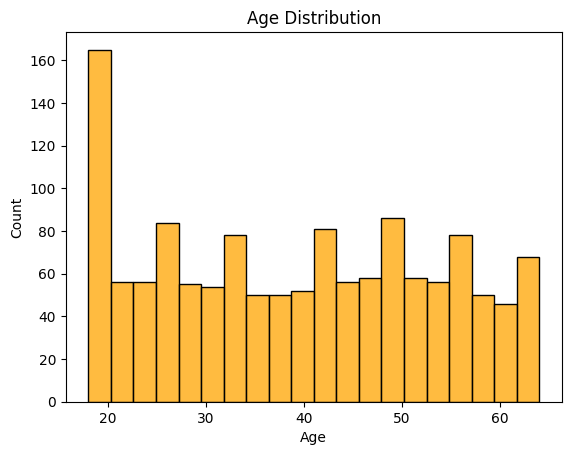

In [40]:
# Age Distribution
sns.histplot(df.age,bins=20, kde=False,color='orange')

plt.title('Age Distribution')

plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

Text(0.5, 1.0, 'Gender Distribution')

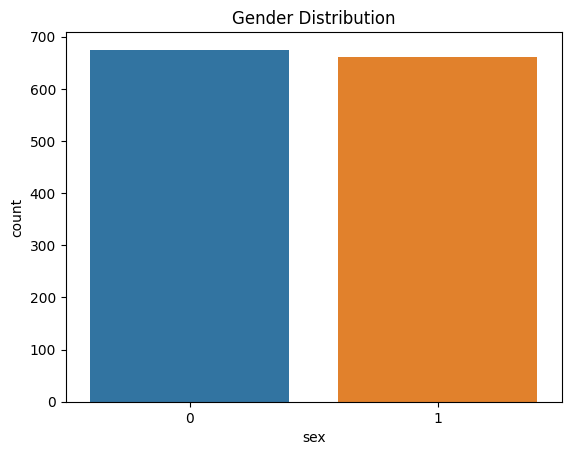

In [41]:
# Gender Plot
sns.countplot(x = 'sex', data = df)

plt.title('Gender Distribution')

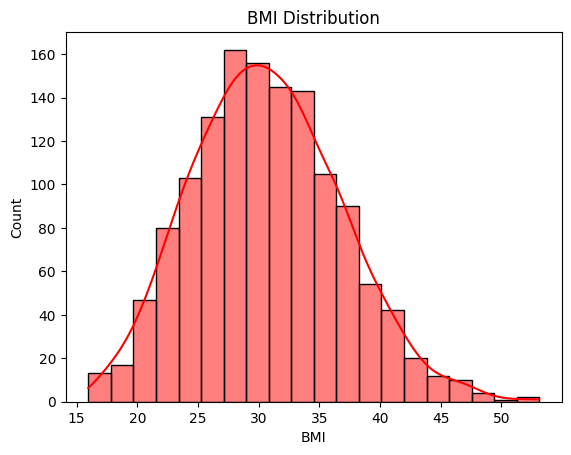

In [42]:
# BMI Distribution
sns.histplot(df.bmi,
             bins=20,
             kde=True,
             color='red')

plt.title('BMI Distribution')

plt.xlabel('BMI')
plt.ylabel('Count')

plt.show()

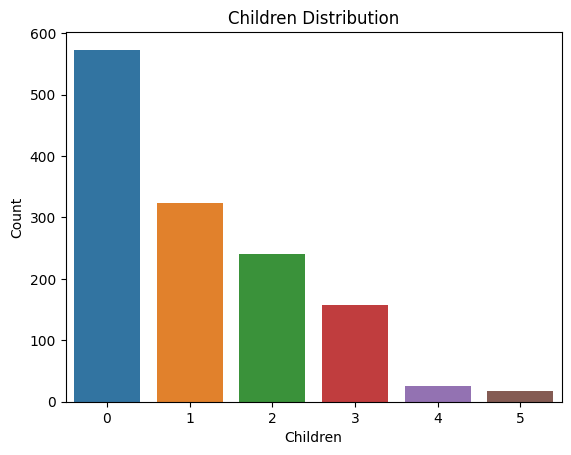

In [43]:
# Child Count Distribution
sns.countplot(x = 'children', data = df)

plt.title('Children Distribution')

plt.xlabel('Children')
plt.ylabel('Count')

plt.show()

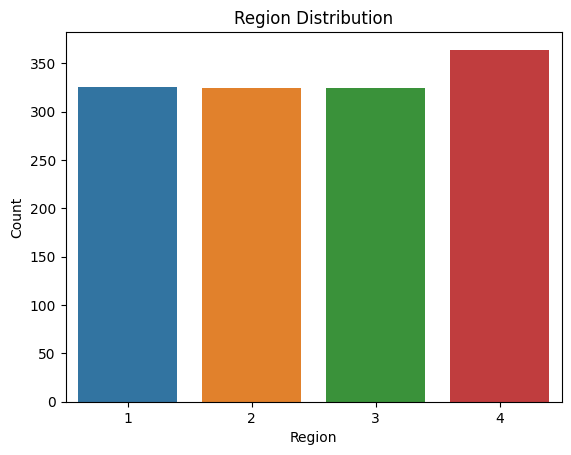

In [44]:
# Regionwise Plot
sns.countplot(x = 'region', data = df)

plt.title('Region Distribution')

plt.xlabel('Region')
plt.ylabel('Count')

plt.show()

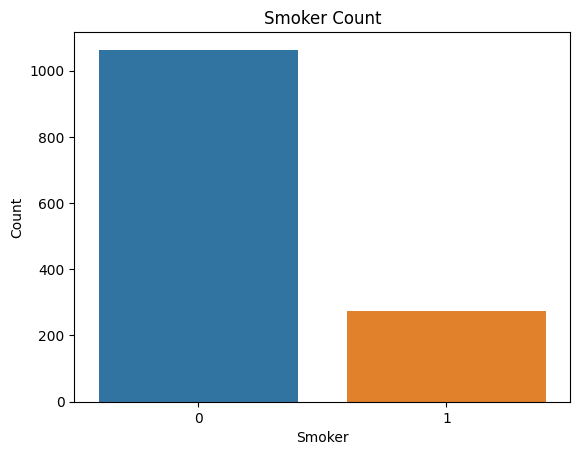

In [45]:
# Count of Smokers
sns.countplot(x = 'smoker', data = df)

plt.title('Smoker Count')

plt.xlabel('Smoker')
plt.ylabel('Count')

plt.show()

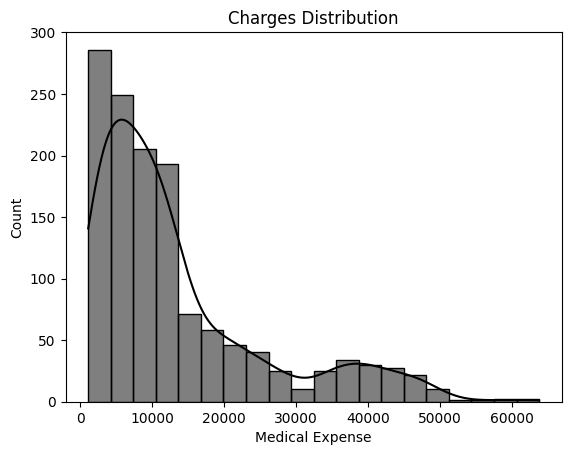

In [46]:
# Charges Distribution
sns.histplot(df.charges,bins=20, kde=True,color='black')

plt.title('Charges Distribution')

plt.xlabel('Medical Expense')
plt.ylabel('Count')

plt.show()



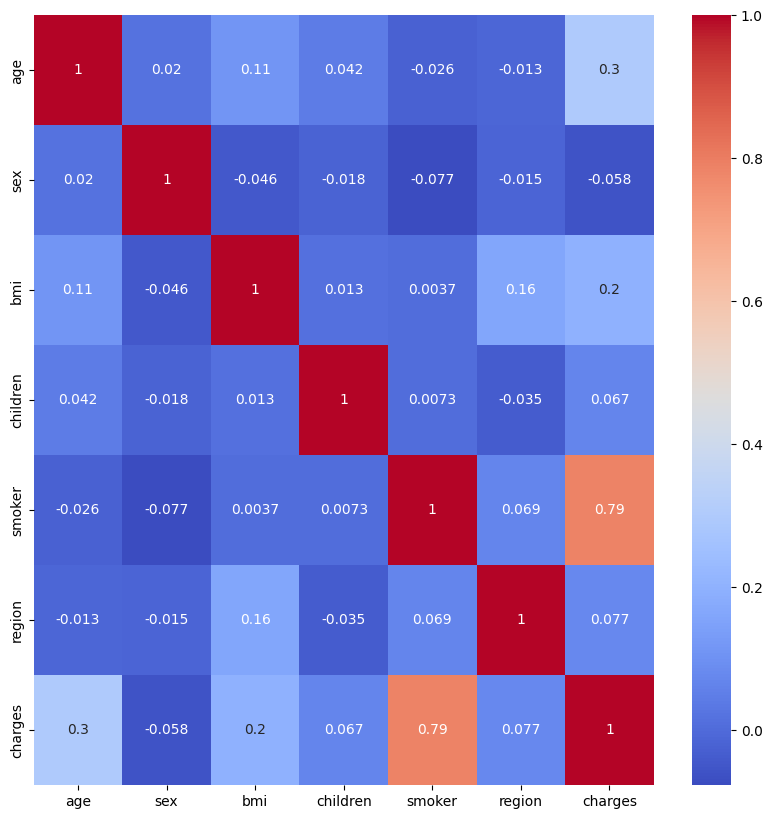

In [47]:
# Plotting the Coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


In [48]:
# Coorelation Matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,-0.012555,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.014506,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.162599,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,-0.035455,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.068838,0.787234
region,-0.012555,-0.014506,0.162599,-0.035455,0.068838,1.000000,0.076730
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,0.076730,1.000000


# Model Building

In [49]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'
Predictors=['age', 'sex', 'bmi',
           'children', 'smoker', 'region']

X = df[Predictors].values
y = df[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1069, 6)
(1069,)
(268, 6)
(268,)


## Multiple Linear Regression

In [51]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG = RegModel.fit(X_train, y_train)
prediction = LREG.predict(X_test)

# Taking the standardized values to original scale
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted'+TargetVariable)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
print('Accuracy', LREG.score(X_train, y_train))

LinearRegression()
R2 Value: 0.7292307534469553

##### Model Validation and Accuracy Calculations ##########
       charges  Predictedcharges
0   8688.85885            7770.0
1   5708.86700            5996.0
2  11436.73815           14224.0
3  38746.35510           31602.0
4   4463.20510            9207.0
Mean Accuracy on test data: 58.01810470045547
Median Accuracy on test data: 72.57136190376144
Accuracy 0.7292307534469553


## Decision Tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6)
R2 Value: 0.8842313201537324

##### Model Validation and Accuracy Calculations ##########
       charges  Predictedcharges
0   8688.85885            9153.0
1   5708.86700           11549.0
2  11436.73815           10889.0
3  38746.35510           46411.0
4   4463.20510            5476.0
Mean Accuracy on test data: 59.620941569794326
Median Accuracy on test data: 86.85871142637134
Accuracy 0.8842313201537324


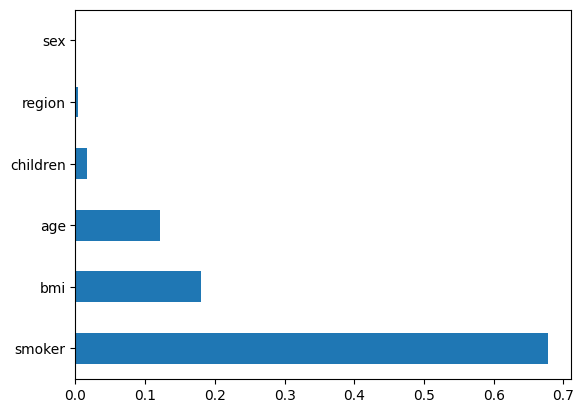

In [52]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
print('Accuracy', DT.score(X_train, y_train))

## Random Forest

RandomForestRegressor(criterion='friedman_mse', max_depth=2, n_estimators=400)
R2 Value: 0.8187624584212789

##### Model Validation and Accuracy Calculations ##########
       charges  Predictedcharges
0   8688.85885           12641.0
1   5708.86700            5714.0
2  11436.73815           12736.0
3  38746.35510           41213.0
4   4463.20510            5714.0
Mean Accuracy on test data: 51.5057391104981
Median Accuracy on test data: 79.76647412210158
Accuracy 0.8187624584212789


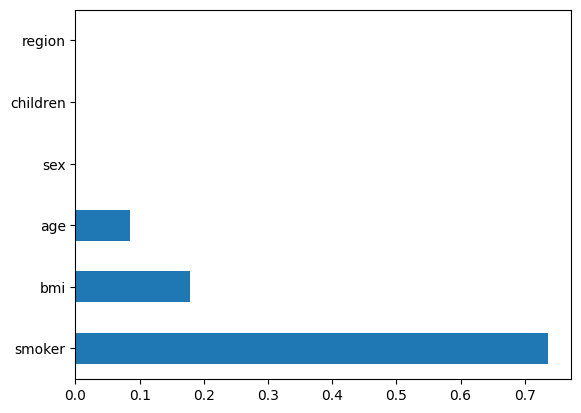

In [53]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
print('Accuracy', RF.score(X_train, y_train))

## ADABoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=500)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.8176041297671506

##### Model Validation and Accuracy Calculations ##########
       charges  Predictedcharges
0   8688.85885           13284.0
1   5708.86700            9278.0
2  11436.73815           14365.0
3  38746.35510           44360.0
4   4463.20510            9464.0
Mean Accuracy on test data: 24.699671830317172
Median Accuracy on test data: 58.02139918270848
Accuracy 0.8176041297671506


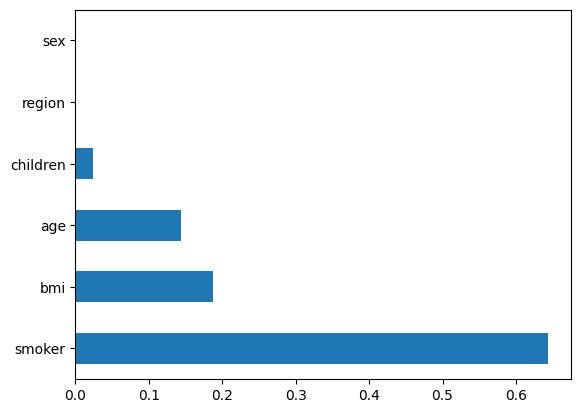

In [54]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
print('Accuracy', AB.score(X_train, y_train))

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)
[11:30:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9173202734558881

##### Model Validation and Accuracy Calculations ##########
       charges  Predictedcharges
0   8688.85

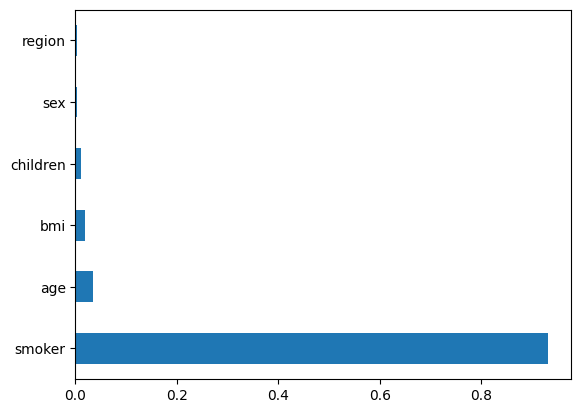

In [55]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
print('Accuracy', XGB.score(X_train, y_train))

## KNN

In [56]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
print('Accuracy', KNN.score(X_train, y_train))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.5416841080894244

##### Model Validation and Accuracy Calculations ##########
       charges  Predictedcharges
0   8688.85885            9262.0
1   5708.86700            9367.0
2  11436.73815           27857.0
3  38746.35510            5376.0
4   4463.20510            9171.0
Mean Accuracy on test data: 25.49494870018769
Median Accuracy on test data: 59.92040012315298
Accuracy 0.5416841080894244


## SVM

In [57]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=5, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
print('Accuracy', SVM.score(X_train, y_train))

SVR(C=5, degree=20, gamma=0.01)
R2 Value: -0.09873830063559397

##### Model Validation and Accuracy Calculations ##########
       charges  Predictedcharges
0   8688.85885            9271.0
1   5708.86700            8533.0
2  11436.73815            9496.0
3  38746.35510            8532.0
4   4463.20510            8651.0
Mean Accuracy on test data: 4.513891298465296
Median Accuracy on test data: 41.77229101434611
Accuracy -0.09873830063559397


# Model Deployment

In [58]:
print('Accuracy of Linear Regression', LREG.score(X_train, y_train))
print('Accuracy of Decision Trees', DT.score(X_train, y_train))
print('Accuracy of Random Forest', RF.score(X_train, y_train))
print('Accuracy of ADABoost', AB.score(X_train, y_train))
print('Accuracy of XGBoost', XGB.score(X_train, y_train))
print('Accuracy of KNN', KNN.score(X_train, y_train))
print('Accuracy of SVM', SVM.score(X_train, y_train))

Accuracy of Linear Regression 0.7292307534469553
Accuracy of Decision Trees 0.8842313201537324
Accuracy of Random Forest 0.8187624584212789
Accuracy of ADABoost 0.8176041297671506
Accuracy of XGBoost 0.9173202734558881
Accuracy of KNN 0.5416841080894244
Accuracy of SVM -0.09873830063559397


In [59]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'sex', 'bmi',
           'children', 'smoker', 'region']

X=df[Predictors].values
y=df[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1337, 6)
(1337,)


In [60]:
# choose from different tunable hyper parameters
# Decision Trees (Multiple if-else statements!)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Training the model on 100% Data available
FinalXGBModel=RegModel.fit(X,y)

[11:30:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

print('\nFinal Average Accuracy of the model:', round(FinalXGBModel.score(X, y),2))


Final Average Accuracy of the model: 0.92


In [62]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final XGBModel
with open('FinalXGBModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalXGBModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content
